# Apprentissage supervisé en Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

# 1. Généralités

## 1.1. Apprentissage supervisé ou non

Quelques exemples d'apprentissage automatique :
* Apprendre à classifier des e-mails en spam ou pas spam ;
* Apprendre à faire 3 segments de clients à partir de leurs données d'achat.
Le premier exemple est de l'apprentissage supervisé, le deuxième non.

## 1.2. Classification ? Régression ?

Lorsque l'on cherche à classer des e-mails en spam ou non spam, on fait de la classification.

Lorsque l'on cherche à prévoir une variable continue (par exemple un prix), on fait de la régression.

Plus d'exemples sur [le site de scikit-learn](scikit-learn.org) (que l'on va utiliser ici).

# 2. Apprentissage supervisé

La procédure sera toujours la même : `.fit()` et `.predict()`.

Nous allons commencer par une méthode simple de classification : les plus proches voisins.

## 2.1. Plus proches voisins

In [2]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [5]:
knn = KNeighborsClassifier(n_neighbors=6)

In [20]:
knn.fit(iris[['sepal_length', 'sepal_width']], iris['species'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

Attention, vous devez passer soit des NumPy arrays, soit des pandas DataFrame ou Series.

Il ne faut pas de valeurs vides ; les variables explicatives doivent être des nombres ; les labels doivent être discrets.

In [21]:
knn.predict(np.array([[5, 3], [4, 2]]))

array(['setosa', 'versicolor'], dtype=object)

In [22]:
knn.predict_proba(np.array([[5, 3], [4, 2]]))

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.33333333,  0.5       ,  0.16666667]])

In [9]:
knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<font color=blue>Exercice</font>

Charger le dataset 'tips' et utiliser les plus proches voisins pour prédire Homme ou Femme selon le montant du tip et le montant de la facture (ramenée au nombre de personnes).

In [10]:
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [11]:
tips['total_bill_pp'] = tips['total_bill'] / tips['size']
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,total_bill_pp
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333


In [12]:
knn.fit(tips[['total_bill', 'tip']], tips['sex'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [13]:
knn.predict(np.array([[17, 1], [21, 3.5]]))

array(['Male', 'Male'], dtype=object)

In [14]:
knn.predict_proba(np.array([[17, 1], [21, 3.5]]))

array([[ 0.33333333,  0.66666667],
       [ 0.16666667,  0.83333333]])

## 2.2. Comment mesurer la performance d'un algorithme de classification ?

On va séparer l'ensemble des données en deux : apprentissage et test !

`sklearn` rend cette manipulation extrêmement simple !

Chargeons d'abord quelques données.

In [15]:
df = pd.read_csv('banque_mondiale_2015.csv')
df.tail(3)

,Country Name,Country Code,Year,Life expectancy,PIB per capita,Population,Region Name
177,Guam,GUM,2015,79.379000,33752.244165,169885.0,Oceania
178,South Sudan,SSD,2015,56.111512,730.580101,12339812.0,Africa
179,Somalia,SOM,2015,55.685585,549.266977,10787104.0,Africa


In [16]:
X = df[['Life expectancy', 'PIB per capita']]
y = (df['Region Name'] == 'Africa')

In [17]:
import matplotlib.pyplot as plt

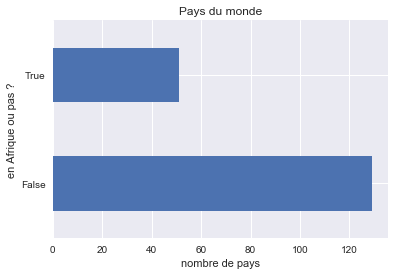

In [18]:
y.value_counts().plot(kind='barh')

plt.title("Pays du monde")
plt.xlabel("nombre de pays")
plt.ylabel("en Afrique ou pas ?")

plt.show()

C'est parti !

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

Chaque argument de cette fonction a son importance.

Reste à faire notre `fit` et notre `predict`.

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [25]:
y_pred = knn.predict(X_test)

In [33]:
sum(y_pred & y_test) / len(y_test)

0.20370370370370369

In [34]:
sum((~y_pred) & (~y_test)) / len(y_test)

0.70370370370370372

In [37]:
sum(y_pred == y_test) / len(y_test)

0.90740740740740744

In [38]:
df[df["Country Name"] == "France"]

,Country Name,Country Code,Year,Life expectancy,PIB per capita,Population,Region Name
31,France,FRA,2015,82.670732,36352.480072,66538391.0,Europe


In [39]:
knn.predict(np.array([[82, 36352]]))

array([False], dtype=bool)

La méthode nous donne le score directement (accuracy/précision). La précision est la somme des vrais positifs et vrais négatifs, divisé par la somme de la population.

In [41]:
knn.score(X_test, y_test)

0.90740740740740744

Pas trop mal...

<font color=blue>Exercice</font>

Vérifier la définition de la précision (faites le calcul).

In [42]:
y_pred = knn.predict(X_test)

(y_pred == y_test).mean()

0.90740740740740744

<font color=blue>Exercice</font>

Quelle est la précision de l'estimateur Homme/Femme fait précédemment ?

Je vous ai créé une fonction (basée sur un code qu'on peut trouver sur le site de scikit-learn) pour afficher ce que fait le classificateur.

In [43]:
from plot_surface import plot_surface

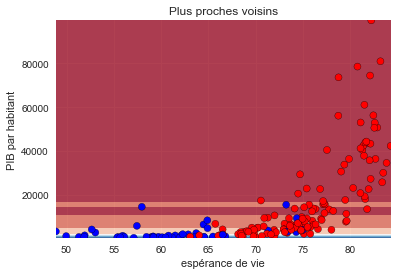

In [44]:
plot_surface(X, y, knn, "Plus proches voisins", "espérance de vie", "PIB par habitant")

### 2.2.2. La précision, ce n'est pas suffisant

Réfléchissez au cas de l'anti-spam et vous verrez !

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y_test, y_pred))

[[38  1]
 [ 4 11]]


In [26]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.90      0.97      0.94        39
       True       0.92      0.73      0.81        15

avg / total       0.91      0.91      0.90        54



Précision
```
tp / (tp + fp)
```

Rappel
```
tp / (tp + fn)
```

F1-score
```
2 * précision * rappel / (précision + rappel)
```

**Souvent, on va regarder le F1-score.**

<font color=blue>Exercice</font>

Calculer le rapport sur l'estimateur Homme/Femme ?

## 2.3. Régression logistique et ROC curve

Contrairement à ce que son nom indique, la régression logistique est une méthode de classification.

Elle cherche à faire passer une ligne droite entre deux groupes que l'on veut classifier.

### 2.3.1. La régression logistique dans scikit-learn

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logreg = LogisticRegression()

In [29]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
df.loc[df['Country Name'] == 'France'].tail(1)

,Country Name,Country Code,Year,Life expectancy,PIB per capita,Population,Region Name
31,France,FRA,2015,82.670732,36352.480072,66538391.0,Europe


In [32]:
logreg.predict(np.array([[82.6, 36352]]))

array([False], dtype=bool)

Ok, il semble que sur la France ça marche pas mal.

### 2.3.2. Performance de l'algo

In [33]:
logreg.score(X_test, y_test)

0.85185185185185186

In [34]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.83      1.00      0.91        39
       True       1.00      0.47      0.64        15

avg / total       0.88      0.85      0.83        54



La régression logistique prédit une probabilité d'être ici True ou False. Par défaut, on impose ensuite un seuil de probabilité à 0.5 pour séparer la population False de la population True, mais on pourrait faire varier ce seuil.

### 2.3.3. Faisons bouger le seuil

In [82]:
from sklearn.metrics import roc_curve

In [83]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

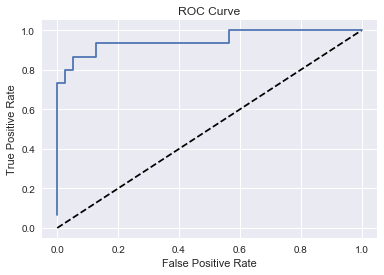

In [86]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

**Plus la courbe touche le coin en haut à gauche, mieux c'est ! On appelle cela le AUC (Area Under the Curve) score.**

<font color=blue>Exercice</font>

Comparez les courbes ROC des plus proches voisins et de la régression logistique sur votre exemple Homme/Femme.

## 2.4. Mettre ses données à l'échelle

In [87]:
from plot_surface import plot_surface

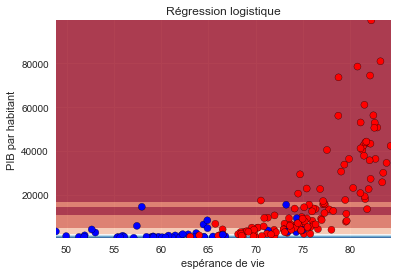

In [45]:
plot_surface(X, y, knn, "Régression logistique", "espérance de vie", "PIB par habitant")

In [47]:
import matplotlib.pyplot as plt

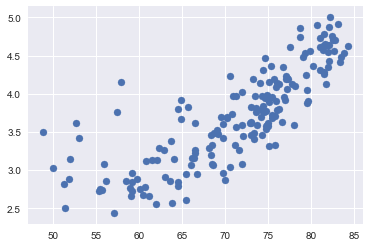

In [48]:
plt.scatter(df['Life expectancy'], np.log10(df['PIB per capita']))
plt.show()

## 2.4.2. Pipelines

Les pipelines sont une fonctionnalité très pratique de `scikit-learn`. Ils permettent de mettre bout-à-bout plusieurs opérations, typiquement de mettre un preprocessing des données (mise à l'échelle, etc.) avant de lancer la classification elle-même.

In [49]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline

In [64]:
# Notre fonction spécifique
def partial_log(X):
    Xc = X.copy()
    Xc[:, 1] = np.log10(Xc[:, 1])
    return Xc

# Configuration du pipeline (suite d'opérations élémentaires)
steps = [('log', FunctionTransformer(partial_log)),
         ('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
        
# Création du pipeline
pipe_knn = Pipeline(steps)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [66]:
pipe_knn.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('log', FunctionTransformer(accept_sparse=False,
          func=<function partial_log at 0x00000184563B6EA0>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=True)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [67]:
y_pred = pipe_knn.predict(X_test)

In [68]:
np.mean(y_test == y_pred)

0.94444444444444442

In [70]:
pipe_knn.score(X_test, y_test)

0.94444444444444442

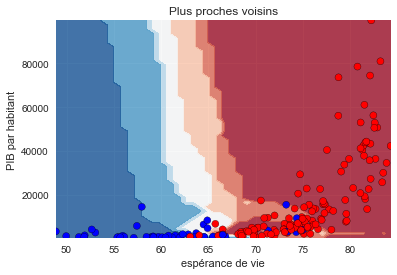

In [59]:
plot_surface(X, y, pipe_knn, "Plus proches voisins", "espérance de vie", "PIB par habitant")

In [155]:
y_pred_prob = pipe_lr.predict_proba(X_test)[:, 1]

In [156]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

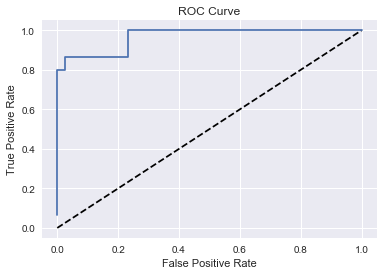

In [157]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

In [158]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.93      1.00      0.96        39
       True       1.00      0.80      0.89        15

avg / total       0.95      0.94      0.94        54



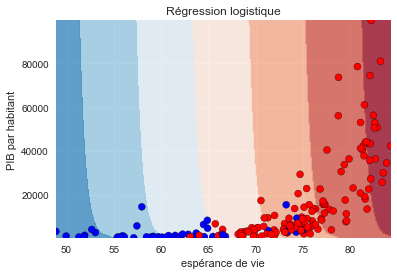

In [159]:
plot_surface(X, y, pipe_lr, "Régression logistique", "espérance de vie", "PIB par habitant")

## 2.4.3. D'autres classificateurs

Les forêts aélatoires sont à la fois simples et efficaces. En revanche, elles ne sont pas faciles à interpréter.

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
# Configuration du pipeline (suite d'op&rations élémentaires)
steps = [('log', FunctionTransformer(partial_log)),
         ('scaler', StandardScaler()),
         ('rf', RandomForestClassifier())]
        
# Création du pipeline
pipe_rf = Pipeline(steps)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [162]:
pipe_rf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('log', FunctionTransformer(accept_sparse=False,
          func=<function partial_log at 0x000001CEB150B378>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=True)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [163]:
y_pred = pipe_rf.predict(X_test)

In [164]:
y_pred_prob = pipe_rf.predict_proba(X_test)[:, 1]

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

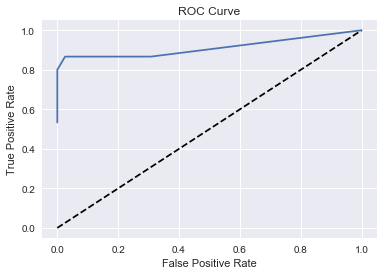

In [166]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

In [167]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.90      0.97      0.94        39
       True       0.92      0.73      0.81        15

avg / total       0.91      0.91      0.90        54



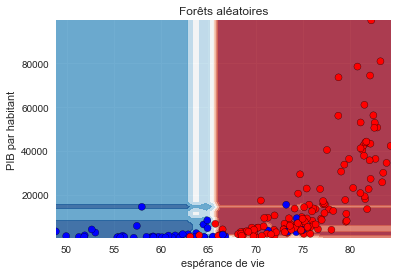

In [170]:
plot_surface(X, y, pipe_rf, "Forêts aléatoires", "espérance de vie", "PIB par habitant")

<font color=blue>Exercice</font>

Quel classificateur se comporte le mieux pour les tip Femme/Homme ?

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
# Notre fonction spécifique
def partial_log(X):
    Xc = X.copy()
    Xc[:, 1] = np.log10(Xc[:, 1])
    return Xc

# Configuration du pipeline (suite d'opérations élémentaires)
steps = [('log', FunctionTransformer(partial_log)),
         ('scaler', StandardScaler()),
         ('lr', LogisticRegression())]
        
# Création du pipeline
pipe_lr = Pipeline(steps)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [74]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('log', FunctionTransformer(accept_sparse=False,
          func=<function partial_log at 0x0000018456488840>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=True)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [75]:
y_pred = pipe_lr.predict(X_test)

In [76]:
pipe_lr.score(X_test, y_test)

0.94444444444444442

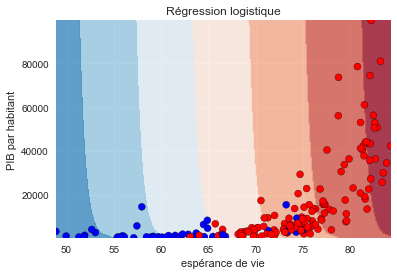

In [77]:
plot_surface(X, y, pipe_lr, "Régression logistique", "espérance de vie", "PIB par habitant")

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
# Notre fonction spécifique
def partial_log(X):
    Xc = X.copy()
    Xc[:, 1] = np.log10(Xc[:, 1])
    return Xc

# Configuration du pipeline (suite d'opérations élémentaires)
steps = [('log', FunctionTransformer(partial_log)),
         ('scaler', StandardScaler()),
         ('rf', RandomForestClassifier(n_estimators=50))]
        
# Création du pipeline
pipe_rf = Pipeline(steps)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [96]:
pipe_rf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('log', FunctionTransformer(accept_sparse=False,
          func=<function partial_log at 0x00000184568408C8>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=True)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [97]:
y_pred = pipe_rf.predict(X_test)

In [98]:
np.mean(y_test == y_pred)

0.94444444444444442

In [99]:
pipe_rf.score(X_test, y_test)

0.94444444444444442

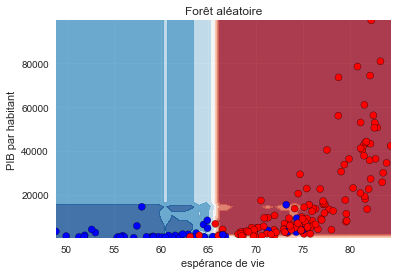

In [100]:
plot_surface(X, y, pipe_rf, "Forêt aléatoire", "espérance de vie", "PIB par habitant")